In [1]:
import sys 
sys.path.insert(1, '../')

In [2]:
import os
import pylab as plt
import numpy as np
from matplotlib import rcParams
from tqdm import tqdm

from Models.Higgins1D.Higgins1DConfiguration import Higgins1DConfiguration
from Models.TdmaParameters1D import TdmaParameters1D
from Models.Higgins1D.Higgins1DTdmaSolver import integrate_tdma_implicit_scheme
from MathHelpers.InitDataHelpers import get_cos, get_normal_rand
from DataAnalyzers.PeaksAnalyzer import calc_peacks
from DataContainers.Experiment import Experiment

from Drawing.DrawTransient1d import draw_amps_stat, draw_transient, draw_timeline_deltas
from Drawing.DrawHelper import set_defaults_1D

In [3]:
base_dir = 'D:\\math\\data30_11_2020'
set_defaults_1D()

In [4]:
def draw_arr(res, left_border=None, right_border=None,w = 3, h = 3):
    fig, axes = plt.subplots(w,h, figsize=(30,15))
    for i,k in enumerate(res):
        ax =axes[i//h][i%h]
        draw_transient(res[i],ax=ax, left_border=left_border, right_border=right_border)
        ax.set_title(f"$dx = {k.method_parameters['dx']} \quad  dt = {k.method_parameters['dt']}$", fontsize=22)
    title = f"$p={res[i].model_config['p']}, q={res[i].model_config['q']}, D_u={res[i].model_config['Du']}, init={calc_peacks(res[i].init_values['u'])}$"
    fig.suptitle(title)
    title = title[1:-1].replace("'", "").replace("{", "").replace("}", "").replace(":","")
    plt.savefig(f'data/{title}_{left_border}_{right_border}.png')
    plt.show()

In [5]:
res = []
conf = Higgins1DConfiguration(2.0, 2.0, 16.5, 1)
for dt in [0.1,0.05, 0.01]:
    for dx in [0.2,0.1,0.05]:
        u_init = get_cos(1, int(round(200*0.2/dx)),1.0, 0.1)
        v_init = get_cos(1, int(round(200*0.2/dx)),1.0, 0.1)
        params = TdmaParameters1D(u_init, v_init, dx, dt, 5000.0, save_timeline=True, timeline_save_step_delta=int(round(2*0.1/dt)))
        res.append(integrate_tdma_implicit_scheme(conf, params))

In [ ]:
draw_arr(res, left_border=0, right_border=10)
draw_arr(res, left_border=120)
print('\n---------------------------\n')

In [6]:
u_init = res[3].end_values['u']
v_init = res[3].end_values['v']
conf = Higgins1DConfiguration(2.0, 2.0, 16.5, 1)
params = TdmaParameters1D(u_init, v_init, 0.2, 0.1, 5000.0, save_timeline=True, timeline_save_step_delta=1)
aaa = integrate_tdma_implicit_scheme(conf, params)
aaa.timelines['u'].shape

(5000, 200)

{'dx': 0.2, 'dt': 0.1, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 1, 'x_max': 40.0, 'method': 'tdma_implicit'}


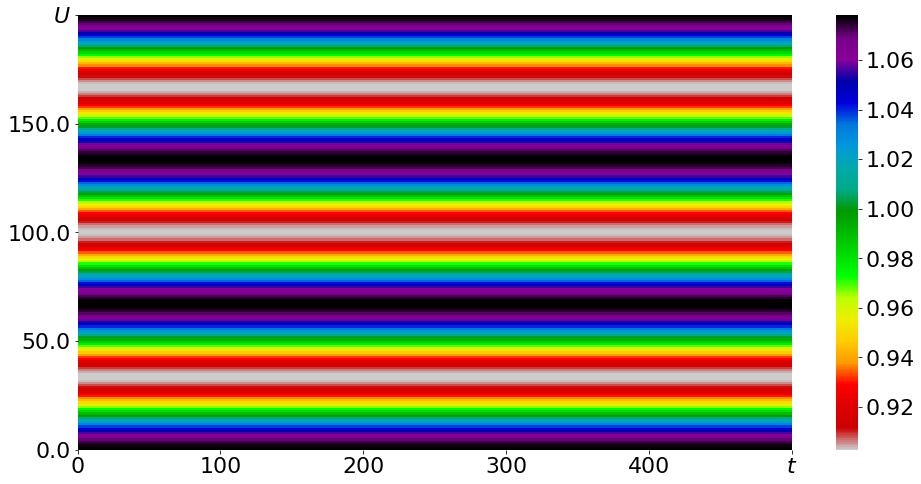

In [7]:
draw_transient(aaa, left_border=0)

In [6]:
res_soft = {}
conf = Higgins1DConfiguration(2.0, 2.0, 16.5, 1)
for Dus in tqdm(np.arange(16,26,1)):
    res_soft[Dus] = []
    for dt in [0.1,0.05, 0.01]:
        for dx in [0.2,0.1,0.05]:
            conf.parameters['Du'] = Dus
            u_init = get_cos(1, int(round(200*0.2/dx)),1.0, 0.1)
            v_init = get_cos(1, int(round(200*0.2/dx)),1.0, 0.1)
            params = TdmaParameters1D(u_init, v_init, dx, dt, 5000.0, save_timeline=True, timeline_save_step_delta=int(round(2*0.1/dt)))
            res_soft[Dus].append(integrate_tdma_implicit_scheme(conf, params))

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:38<00:00,  8.92s/it]


In [13]:
res_soft_1 = {}
conf = Higgins1DConfiguration(2.0, 2.0, 16.5, 1)
for Dus in tqdm(np.arange(16,26,1)):
    res_soft_1[Dus] = []
    for dt in [0.1,0.05, 0.01]:
        for dx in [0.2,0.1,0.05]:
            conf.parameters['Du'] = Dus
            u_init = get_cos(2, int(round(200*0.2/dx)),1.0, 0.1)
            v_init = get_cos(2, int(round(200*0.2/dx)),1.0, 0.1)
            params = TdmaParameters1D(u_init, v_init, dx, dt, 5000.0, save_timeline=True, timeline_save_step_delta=int(round(2*0.1/dt)))
            res_soft_1[Dus].append(integrate_tdma_implicit_scheme(conf, params))

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [02:22<00:00, 12.95s/it]


{'dx': 0.2, 'dt': 0.1, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 2, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.1, 'dt': 0.1, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 2, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.05, 'dt': 0.1, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 2, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.2, 'dt': 0.05, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 4, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.1, 'dt': 0.05, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 4, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.05, 'dt': 0.05, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 4, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.2, 'dt': 0.01, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 20, 'x_max': 40.0, 'method': 'tdma_implicit'}
{'dx': 0.1, 'dt': 0.01, 't_max': 5000.0, 

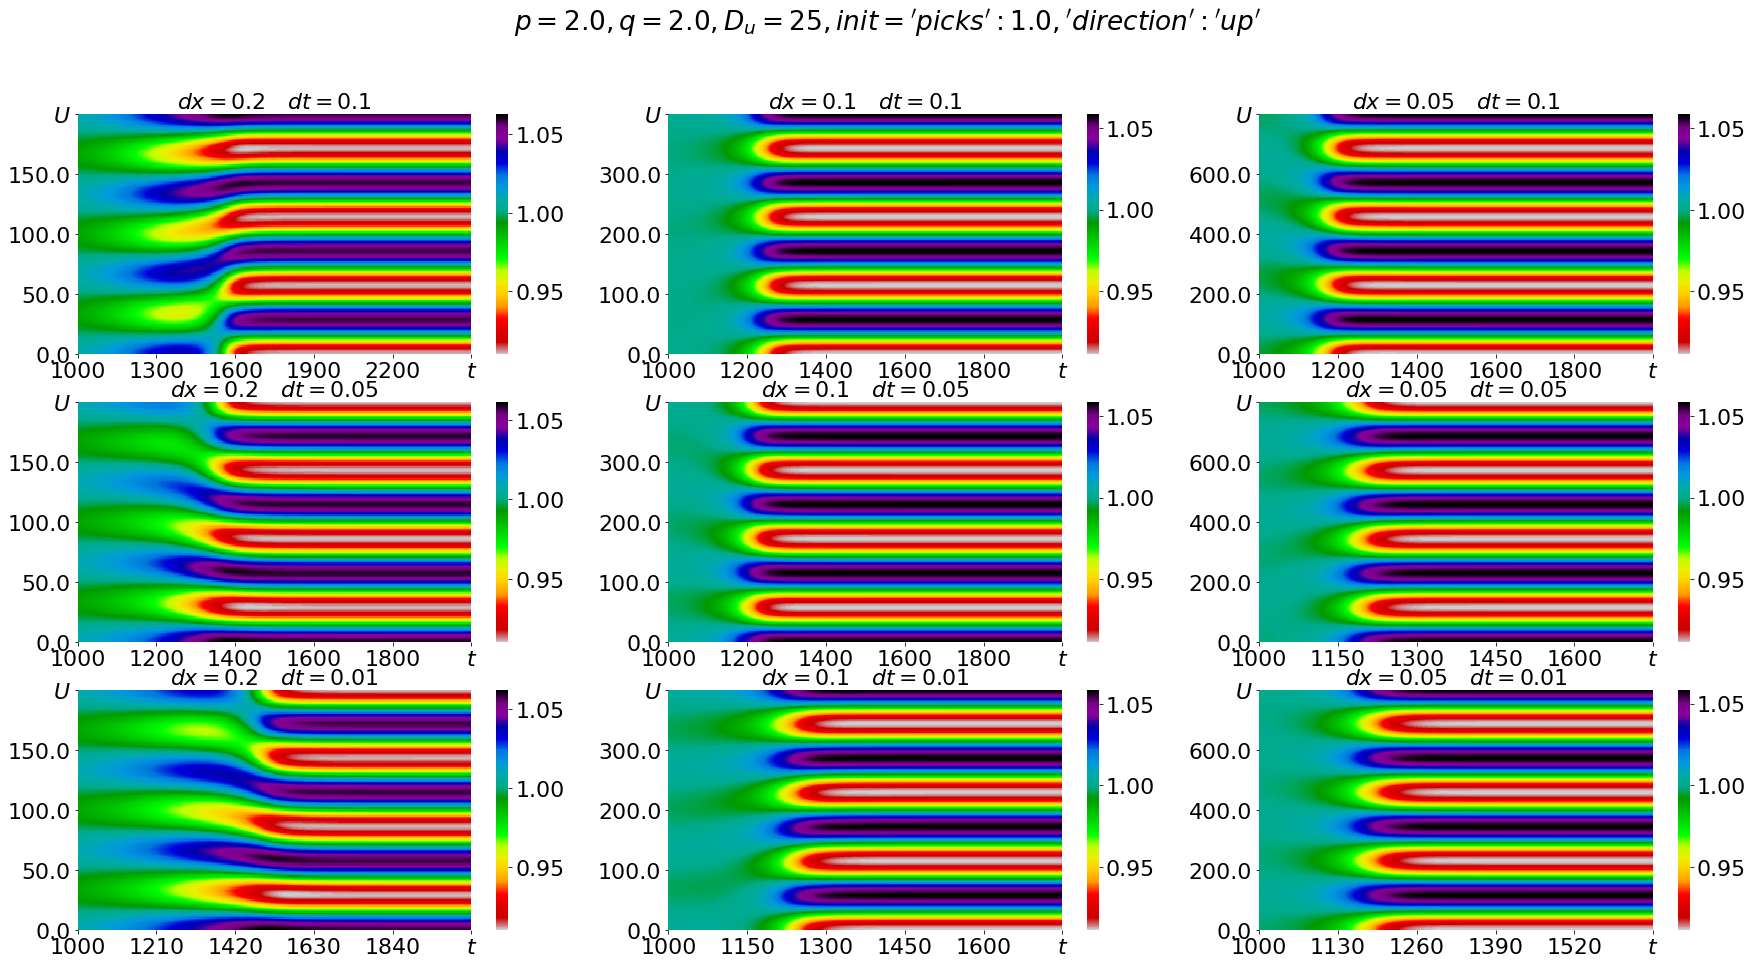


---------------------------

{'dx': 0.2, 'dt': 0.1, 't_max': 5000.0, 'save_timeline': True, 'timeline_save_step_delta': 2, 'x_max': 40.0, 'method': 'tdma_implicit'}


ValueError: zero-size array to reduction operation fmin which has no identity

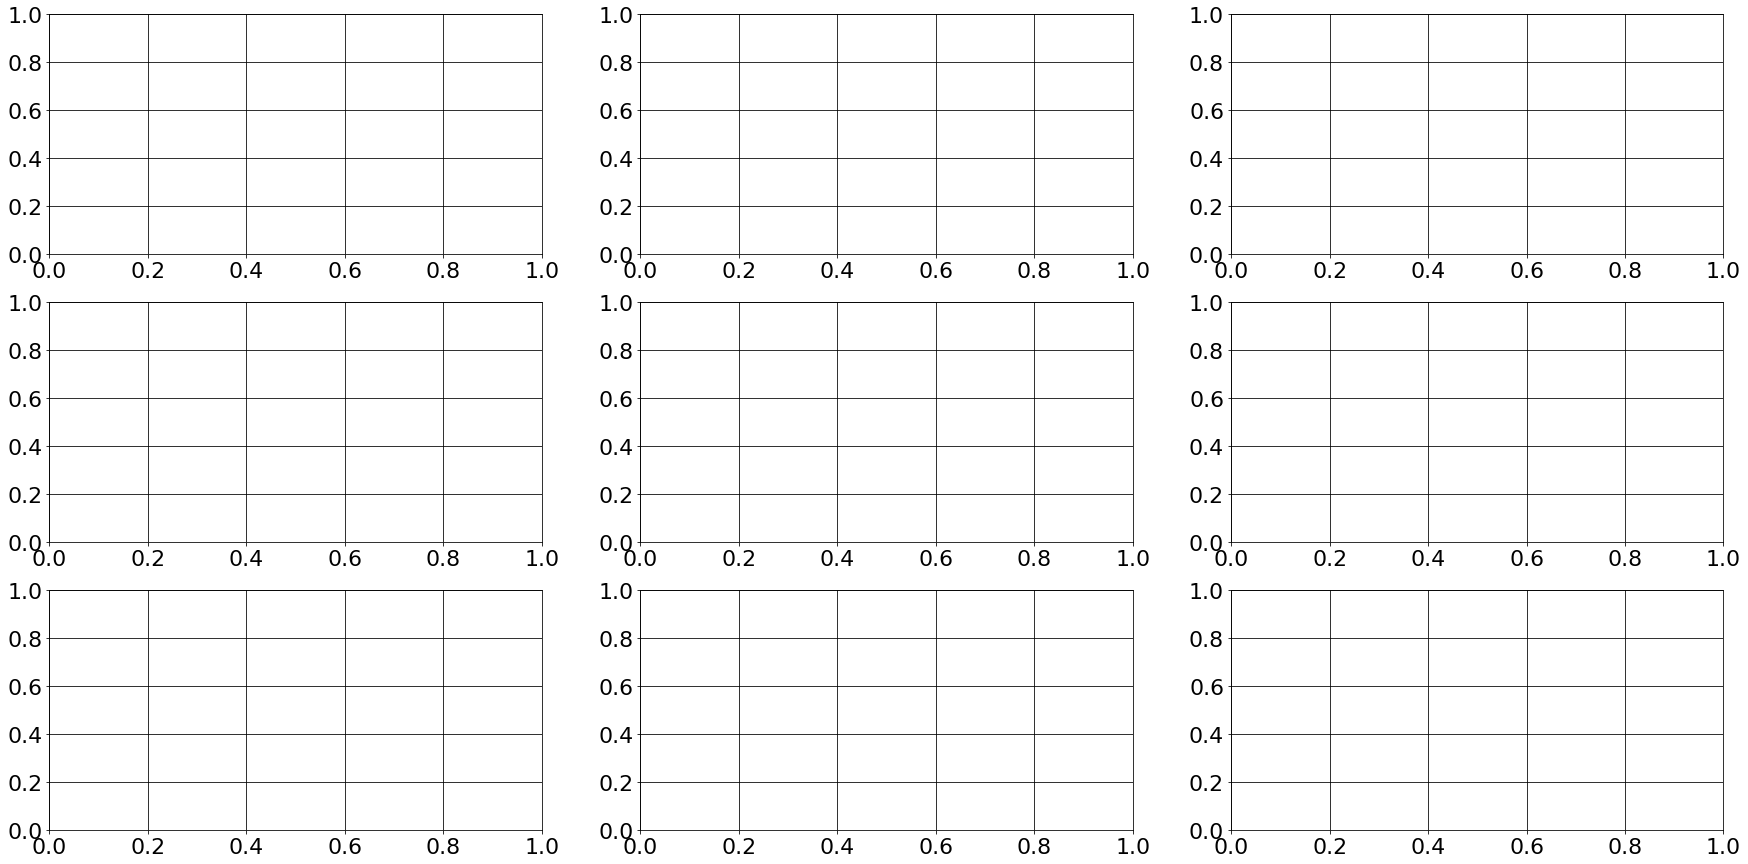

In [10]:
for i in np.arange(16,26,1):
    draw_arr(res_soft[i], left_border=1000)
    print('\n---------------------------\n')